# Revealing the Age Mysteries: A Minimal Deep Learning Project

### Overview: 
This project's Goal was to use the UTKFace dataset to create a lightweight deep-learning model for age detection. Using facial image analysis, our key goal was to reliably estimate an individual's age while maintaining the model's computational efficiency and suitability for deployment on devices with limited resources, such as smartphones or edge devices.

### Objective:
1. Age Recognition: The primary goal was to develop a model that could reliably identify a person's age from facial photos. Acquiring knowledge of age-related features in the dataset was necessary for this.

2. Efficiency of the Model: To guarantee that the model could function well on devices with constrained computational resources, we set out to build a lightweight model.


### Methodologies:
1. Dataset Preparation: To begin, we gathered and prepared the UTKFace dataset, which consists of labeled facial images with information about age, gender, and race.
2. Exploratory data analysis: Visualizing the data.
3. Model Selection: Model Selection - MobileNet V2: We chose MobileNet V2 as our base model due to its efficiency and effectiveness in image-related tasks.
4. Transfer Learning: By utilizing MobileNet V2's pre-trained weights on a sizable dataset (much like a painter using a partially painted canvas), we were able to harness the power of transfer learning and precisely adjust the model's parameters for age detection using our UTKFace dataset.
5. Testing and Deployment: Finally, we tested the model on the test set to measure its performance accurately.
6. Model Optimization: We fine-tuned the model's architecture and hyperparameters to achieve the best trade-off between accuracy and efficiency.
7. repeat step 5-6

#### ensuring that we have access to all the functionalities right from the start to build our model we will first import some libraries

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from PIL import Image
from IPython.display import display

# Lets Begin 🏃‍♀️ 💨

## Scene 1: TREASURE HUNT 💰💍👑

## Data preparation

In [3]:
from IPython.display import HTML
HTML('<img src="./giphy.gif">')

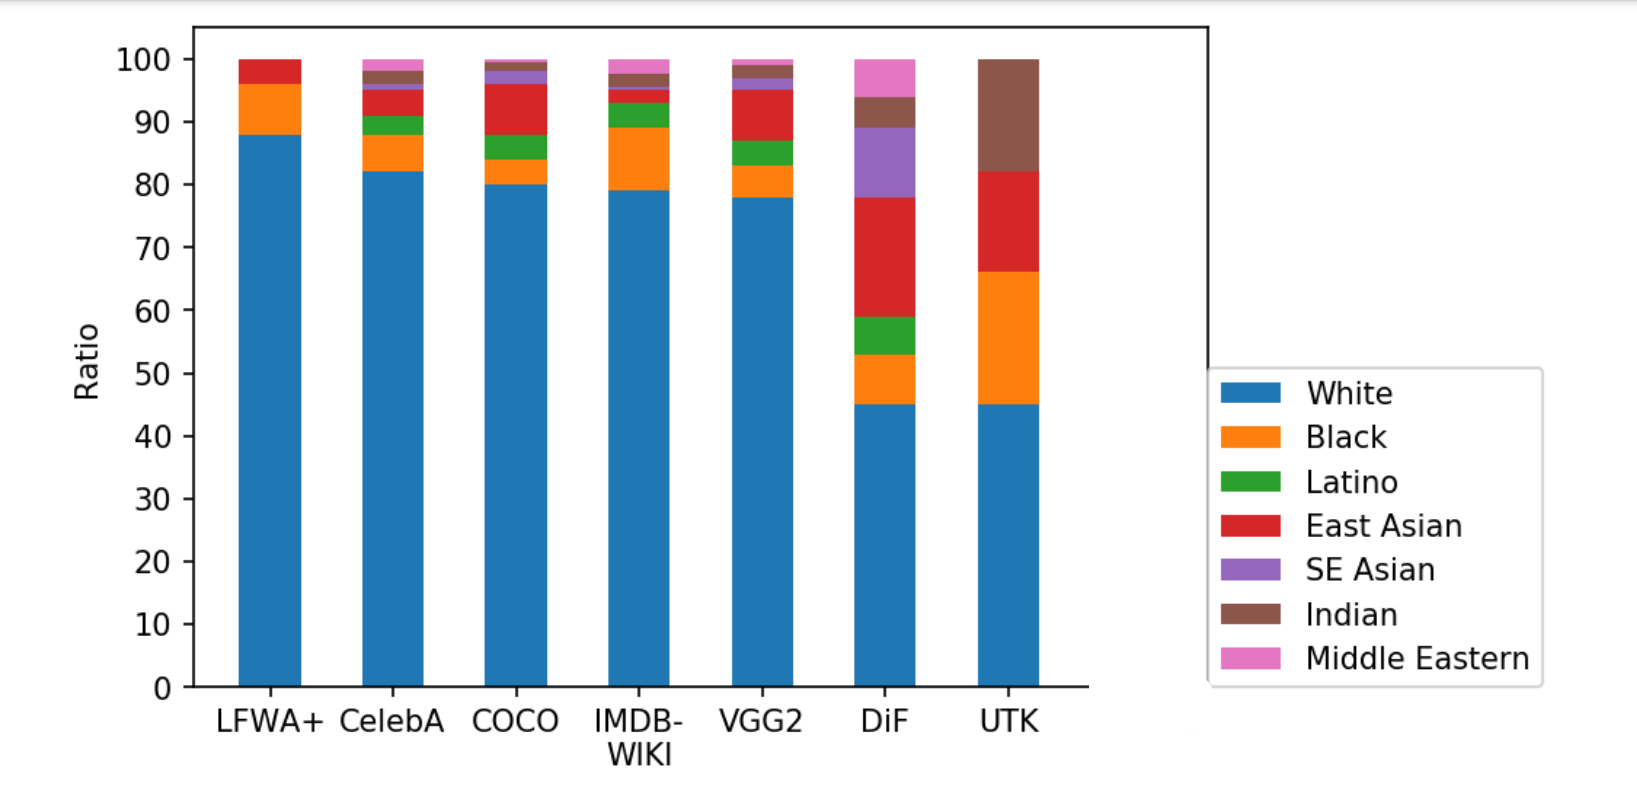

In [5]:
img = Image.open('image.png')
display(img)

* consists of 20k+ face images in the wild (only single face in one image)
* The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg
* [age] is an integer from 0 to 116, indicating the age
* [gender] is either 0 (male) or 1 (female)
* [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
* [date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

#### ok lets start by constructing a structured DataFrame since all we got is images

In [6]:
directory_path = "./UTKFace/"

data = {
    "age" : [],
    "gender" : [],
    "race" : [],
    "date_time" : [],
    "file_name" : []
}

file_names = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

for file in file_names:
    parts = file.split("_")
    if len(parts) != 4:
        continue
    try:
        data["age"].append(int(parts[0]))
        data["gender"].append(int(parts[1]))
        data["race"].append(int(parts[2]))
        data["date_time"].append(parts[3].split(".jpg.chip.jpg")[0])
        data["file_name"].append(file)
    except ValueError:
        print(f"{file} is Skipped due to error")
        continue
        
df = pd.DataFrame(data)

In [7]:
df.shape

(23705, 5)

In [8]:
df.head()

,age,gender,race,date_time,file_name
0,100,0,0,20170112213500903,100_0_0_20170112213500903.jpg.chip.jpg
1,100,0,0,20170112215240346,100_0_0_20170112215240346.jpg.chip.jpg
2,100,1,0,20170110183726390,100_1_0_20170110183726390.jpg.chip.jpg
3,100,1,0,20170112213001988,100_1_0_20170112213001988.jpg.chip.jpg
4,100,1,0,20170112213303693,100_1_0_20170112213303693.jpg.chip.jpg


## EDA

### UniVariate

In [9]:
df.describe()

,age,gender,race
count,23705.000000,23705.000000,23705.000000
mean,33.300907,0.477283,1.269226
std,19.885708,0.499494,1.345638
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,0.000000,1.000000
75%,45.000000,1.000000,2.000000
max,116.000000,1.000000,4.000000


#### Insights: 
1. Age Insights: 
* The minimum age in the dataset is 1 year and max is 116
* the std tells that the most people are between 29 - 19 and 29 + 19 of age
* 25% of the data falls below 23 years, 50% below 29 years (the median), and 75% below 45 years.
* the diff b\w mean and median tells there are outliers
2. Gender Insights: 
* about 47% of the dataset represents the 'Female' gender, since mean is .47
* The std for gender is close to 0.5, suggesting an almost equal distribution between the two genders.
3. Race Insights:
* The value of 1.0 as the median implies that half of the dataset falls below this value and the other half above it i.e. 50 % of the data contains race 0 and 1
* The value of 0.0 indicates that 25% of the dataset consists of individuals belonging to the race 0



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   gender     23705 non-null  int64 
 2   race       23705 non-null  int64 
 3   date_time  23705 non-null  object
 4   file_name  23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


Non-Null Count of 23,705 which is equal to total entries, indicates that there are no missing or null values in the dataset

## Age Distribution

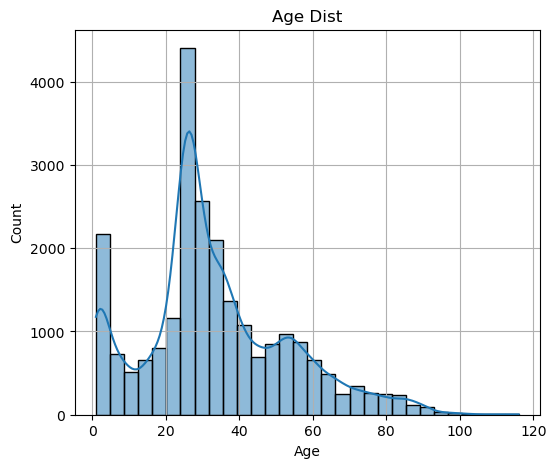

In [11]:
plt.figure(figsize = (6,5))
sns.histplot(df["age"], bins = 30, kde = True)
plt.title("Age Dist")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()

* There are quite a lot of images of persons with ages 1-4 and ages between 20 and 40
* The average is the 33 years and the median is 29 years
* There are very few samples with ages above 70 years
* issue for model training (point 3)

## Gender Distribution

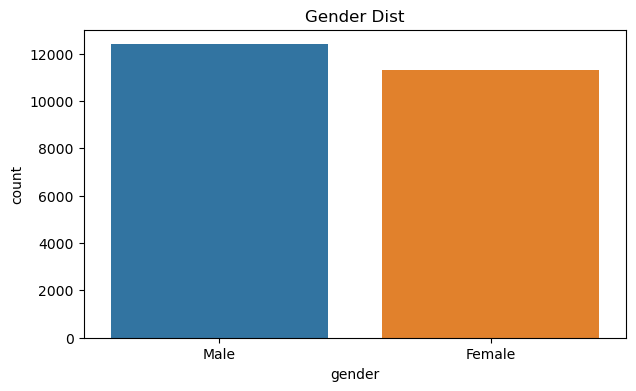

In [12]:
plt.figure(figsize = (7,4))
sns.countplot(data =df, x = "gender")
plt.title("Gender Dist")
plt.xticks(ticks = [0,1], labels = ["Male","Female"])
plt.show()

* Almost equal distribution between Both the genders

## Race Distribution

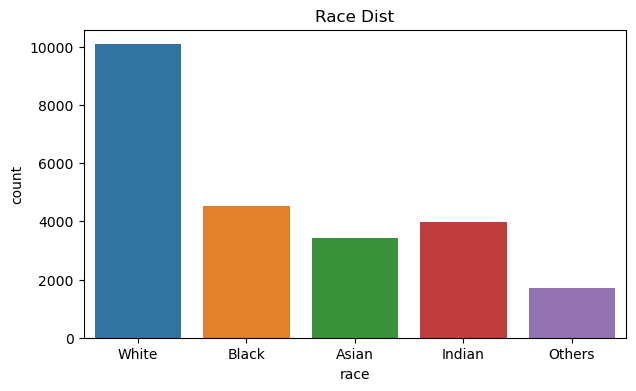

In [13]:
plt.figure(figsize = (7,4))
sns.countplot(data =df, x = "race")
plt.title("Race Dist")
plt.xticks(ticks = [0,1,2,3,4], labels = ["White","Black", "Asian", "Indian", "Others"])
plt.show()

* White race is more dominant
* It shows Imbalance in data

## BiVariate

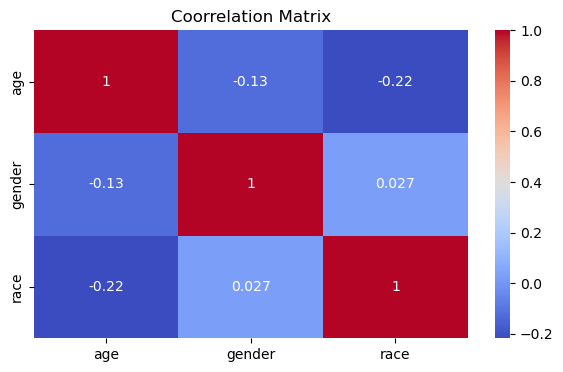

In [14]:
corr = df[["age", "gender", "race"]].corr()
plt.figure(figsize = (7,4))
sns.heatmap(corr, annot =True, cmap = "coolwarm")
plt.title("Coorrelation Matrix")
plt.show()

## Insights:
* There's a weak/ zero correlation between age-gender, age-race.
* weak linear relationship between attributes

## Age Dist with Each Gender

C:\Users\anoop\AppData\Local\Temp\ipykernel_2128\2442270322.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["gender"] == 0]["age"], label = "Male", shade = True)
C:\Users\anoop\AppData\Local\Temp\ipykernel_2128\2442270322.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["gender"] == 1]["age"], label = "Female", shade = True)


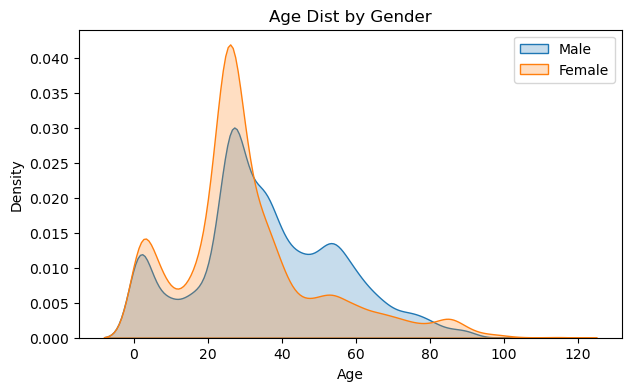

In [16]:
plt.figure(figsize = (7,4))
sns.kdeplot(df[df["gender"] == 0]["age"], label = "Male", shade = True)
sns.kdeplot(df[df["gender"] == 1]["age"], label = "Female", shade = True)
plt.title("Age Dist by Gender")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

## Race Dist with Each Gender (insights)
countplot, hue

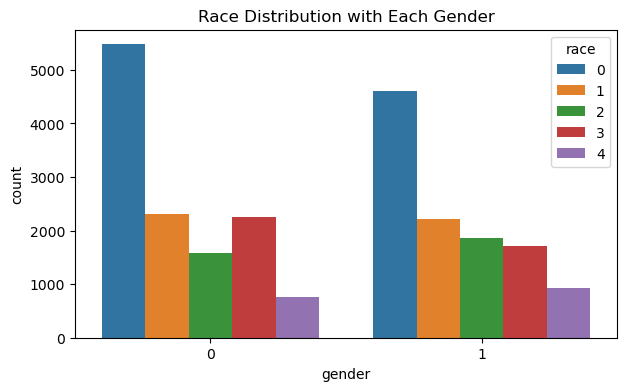

In [17]:
plt.figure(figsize=(7, 4))
sns.countplot(x='gender', hue='race', data=df)
plt.title('Race Distribution with Each Gender')
plt.show()

* Both Gender Shows similar Pattern

## Age Dist with Race Gender (insights) 

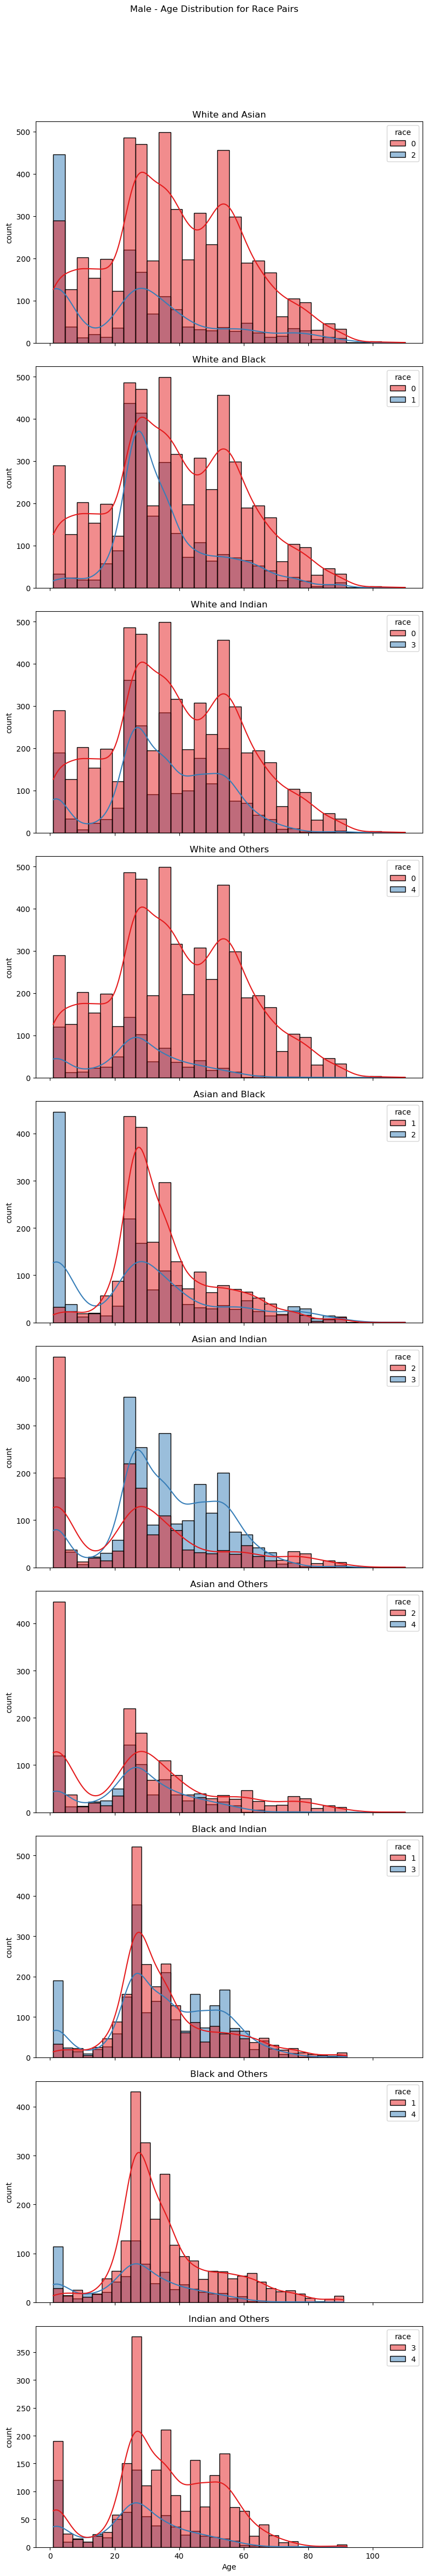

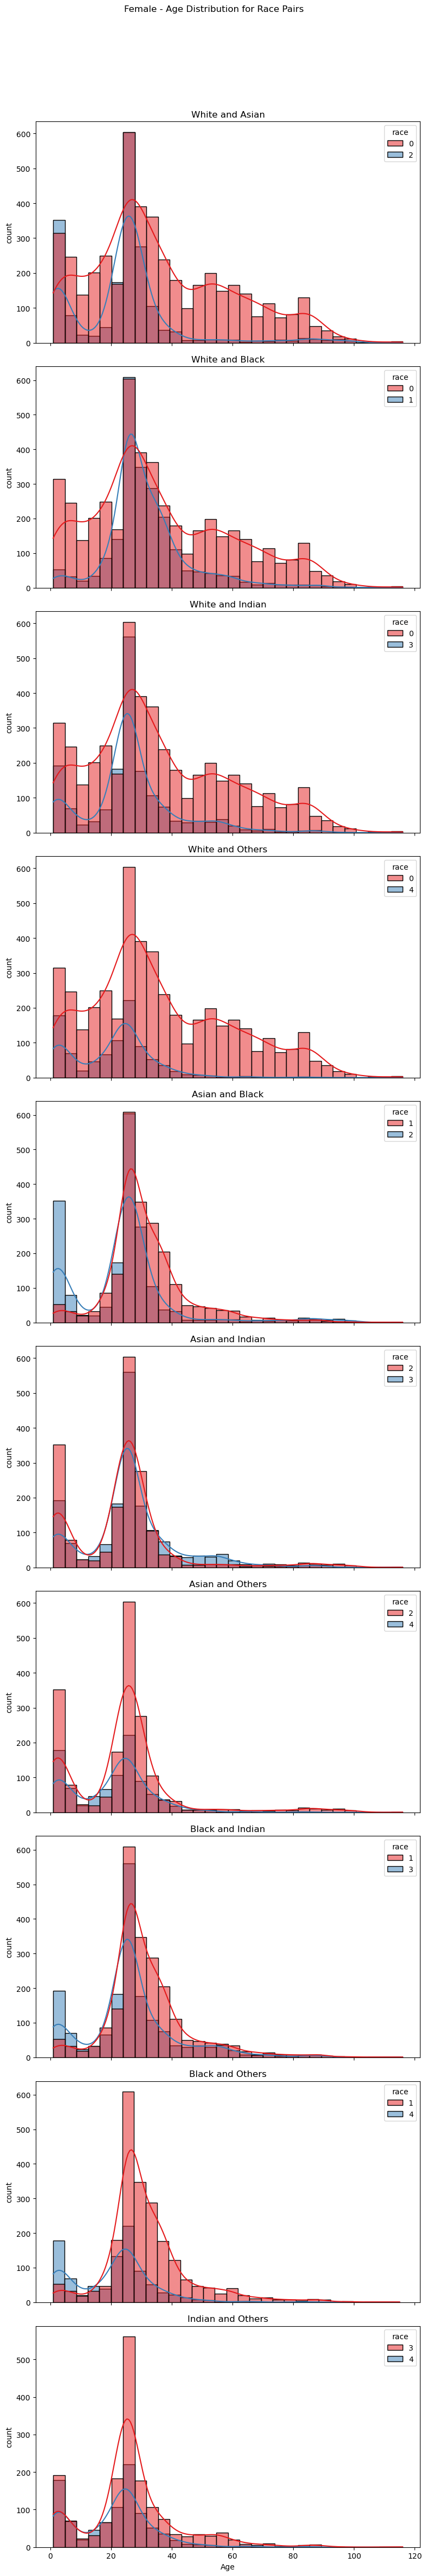

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

race_labels = {
    0: 'White',
    1: 'Black',
    2: 'Asian',
    3: 'Indian',
    4: 'Others'
}
race_pairs = list(combinations(df['race'].unique(), 2))

for gender in [0, 1]:
    fig, axes = plt.subplots(len(race_pairs), 1, figsize=(8, 5 * len(race_pairs)), sharex=True)
    fig.suptitle(f"{'Male' if gender == 0 else 'Female'} - Age Distribution for Race Pairs")

    for idx, pair in enumerate(race_pairs):
        race1, race2 = pair
        
        race_data = df[((df['race'] == race1) | (df['race'] == race2)) & (df['gender'] == gender)] #current race pair and gender

        sns.histplot(data=race_data, x='age', hue='race', bins=30, kde=True, palette='Set1', ax=axes[idx]) # Ploting for current race pair and gender
        
        axes[idx].set_title(f'{race_labels.get(race1, race1)} and {race_labels.get(race2, race2)}')

        # Set x-label only for the last subplot in each column
        if idx == len(race_pairs) - 1:
            axes[idx].set_xlabel('Age')
        else:
            axes[idx].set_xlabel('')

        axes[idx].set_ylabel('count')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


## MultiVariate Analysis

### Age, and Race within each Gender

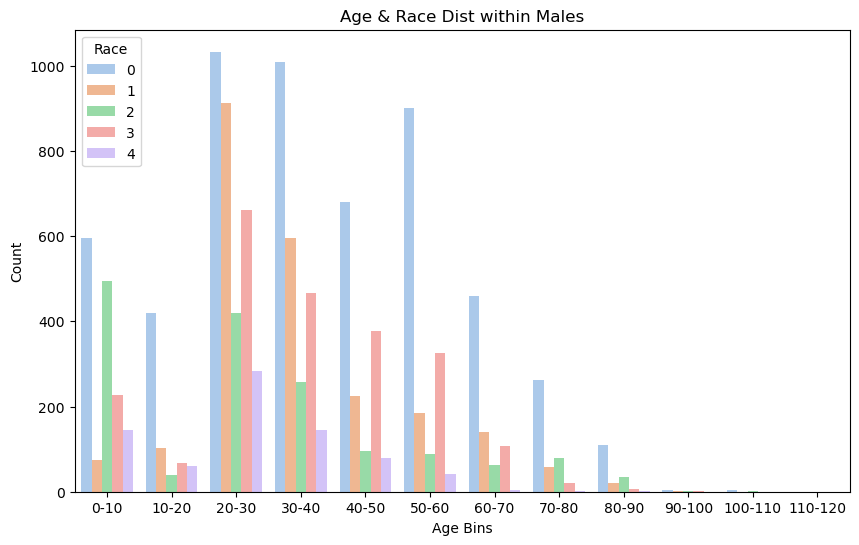

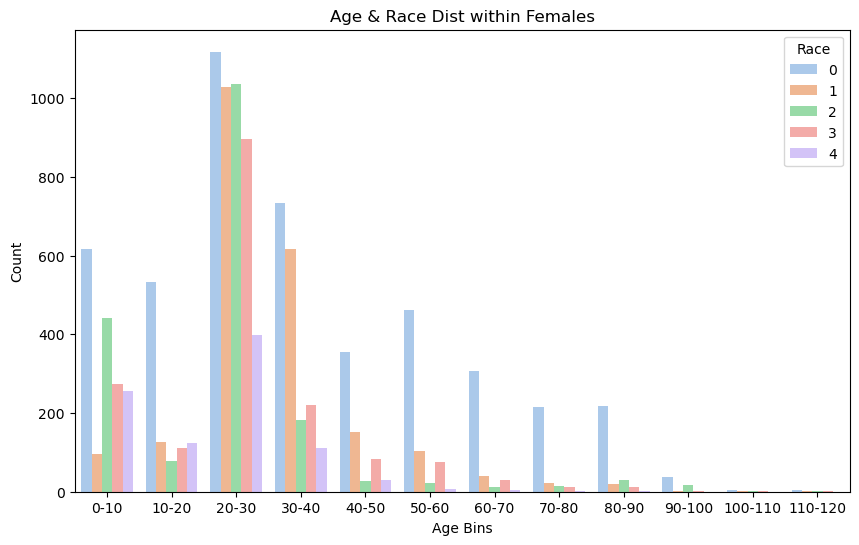

In [19]:
df["age_bins"] = pd.cut(df["age"], bins = [0,10,20,30,40,50,60,70,80,90,100,110,120],
labels = ["0-10", "10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100","100-110","110-120"])

plt.figure(figsize = (10,6))
sns.countplot(x = "age_bins", hue = "race", data = df[df["gender"] == 0], palette = "pastel")
plt.title("Age & Race Dist within Males")
plt.xlabel("Age Bins")
plt.ylabel("Count")
plt.legend(title = "Race")
plt.show()


plt.figure(figsize = (10,6))
sns.countplot(x = "age_bins", hue = "race", data = df[df["gender"] == 1], palette = "pastel")
plt.title("Age & Race Dist within Females")
plt.xlabel("Age Bins")
plt.ylabel("Count")
plt.legend(title = "Race")
plt.show()

## Outlier Analysis

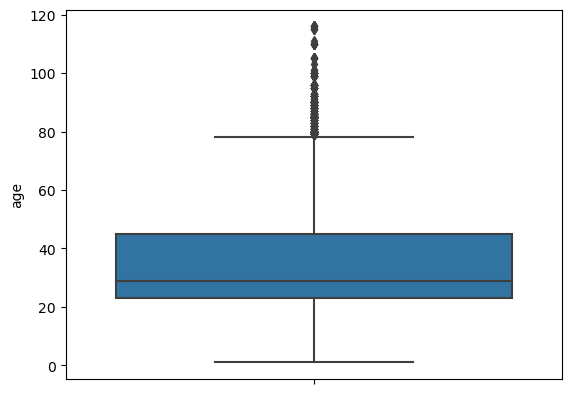

In [21]:
sns.boxplot(y = "age", data = df)
plt.show()

* 25% of the data falls below 23 years
* 50% below 29 years (the median)
* 75% below 45 years.

<Axes: xlabel='gender', ylabel='age'>

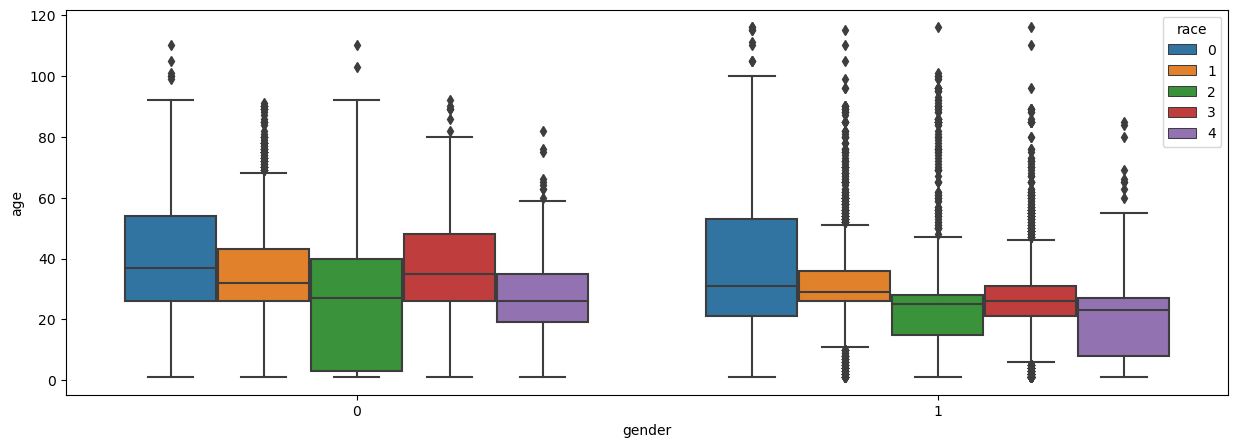

In [20]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='gender', y='age', hue='race')

## IQR => AGE
Q1 => 0.25 QUANTILE Q3 => 0.75 QUANTILE IQR = Q3-Q1

LOWER BOUND = Q1 - 1.5*IQR

UPPER BOUND = Q3 + 1.5*IQR

Image[age] < Lower bound || > Upper Bound => suspicious_images_bound

Plot 20 lower and upper suspicious images

Number of suspicious images: 696


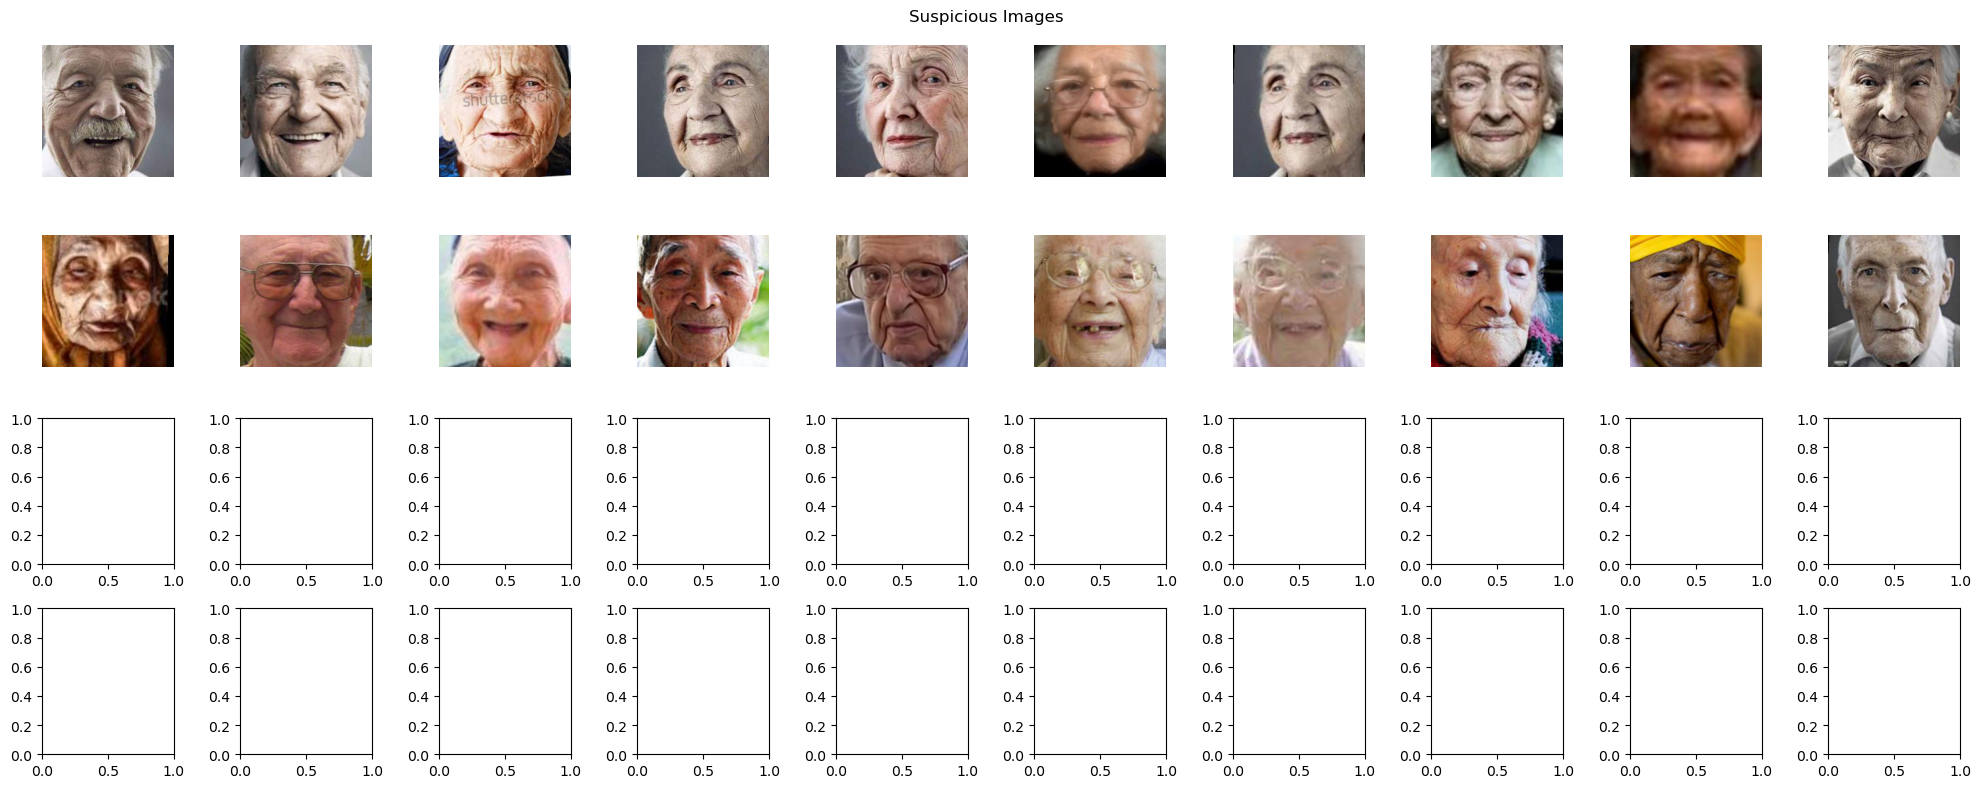

In [22]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

suspicious_images = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

print(f"Number of suspicious images: {len(suspicious_images)}")

fig, axes = plt.subplots(4, 10, figsize=(20, 8))
fig.suptitle('Suspicious Images')

for i, row in enumerate(suspicious_images.head(20).itertuples()):
    img_path = f"./UTKFace/{row.file_name}"
    img = plt.imread(img_path)
    axes[i // 10, i % 10].imshow(img)
    axes[i // 10, i % 10].axis('off')

plt.tight_layout()
plt.show()

* identify potential outliers in the dataset
* visually display

## Temporal Distribution Analysis
finding the changes in data over time

In [23]:
df["date_time"].head()

0    20170112213500903
1    20170112215240346
2    20170110183726390
3    20170112213001988
4    20170112213303693
Name: date_time, dtype: object

In [24]:
problematic_entries = []

for data in df["date_time"]:
    try:
        pd.to_datetime(data, format = "%Y%m%d%H%M%S%f")
    except ValueError:
        problematic_entries.append(data)
        
print(len(problematic_entries))

2


In [25]:
problematic_entries

['20170116220224657 ', '20170116232725357jpg.chip.jpg']

In [26]:
df["date_time"] = df["date_time"].str.strip()

In [27]:
problematic_entries = []

for data in df["date_time"]:
    try:
        pd.to_datetime(data, format = "%Y%m%d%H%M%S%f")
    except ValueError:
        problematic_entries.append(data)
        
print(problematic_entries)

['20170116232725357jpg.chip.jpg']


In [28]:
df["date_time"] = df["date_time"].str.replace("jpg.chip.jpg", "")

C:\Users\anoop\AppData\Local\Temp\ipykernel_2128\669915189.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["date_time"] = df["date_time"].str.replace("jpg.chip.jpg", "")


In [29]:
problematic_entries = []

for data in df["date_time"]:
    try:
        pd.to_datetime(data, format = "%Y%m%d%H%M%S%f")
    except ValueError:
        problematic_entries.append(data)
        
print(problematic_entries)

[]


In [30]:
df["date_time"] = pd.to_datetime(df["date_time"], format = "%Y%m%d%H%M%S%f")

In [31]:
df["year"] = df["date_time"].dt.year

In [32]:
df.head()

,age,gender,race,date_time,file_name,age_bins,year
0,100,0,0,2017-01-12 21:35:00.903,100_0_0_20170112213500903.jpg.chip.jpg,90-100,2017
1,100,0,0,2017-01-12 21:52:40.346,100_0_0_20170112215240346.jpg.chip.jpg,90-100,2017
2,100,1,0,2017-01-10 18:37:26.390,100_1_0_20170110183726390.jpg.chip.jpg,90-100,2017
3,100,1,0,2017-01-12 21:30:01.988,100_1_0_20170112213001988.jpg.chip.jpg,90-100,2017
4,100,1,0,2017-01-12 21:33:03.693,100_1_0_20170112213303693.jpg.chip.jpg,90-100,2017


## Group the data by year, and check the mean of age, sum/count of gender and race

<Axes: xlabel='year,gender'>

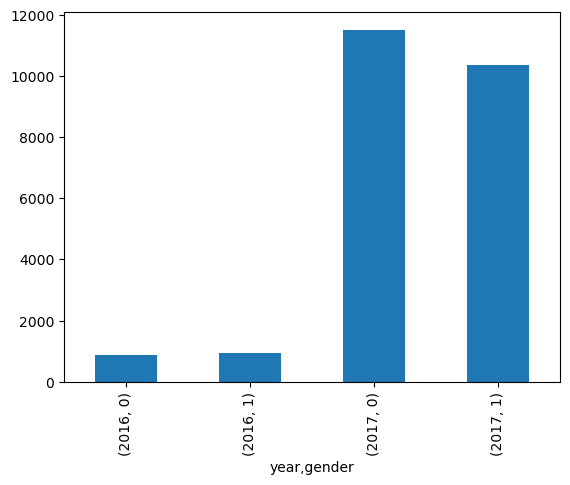

In [33]:
df.groupby(by=['year', 'gender'])['age'].count().plot(kind='bar')

In [34]:
result = df.groupby('year')['age'].mean().reset_index()
result

,year,age
0,2016,3.853926
1,2017,35.751234


In [35]:
grouped_data = df.groupby(['year', 'gender']).size().reset_index(name='count_gender')
grouped_data

,year,gender,count_gender
0,2016,0,872
1,2016,1,949
2,2017,0,11519
3,2017,1,10365


In [36]:
result = df.groupby(['year', 'race']).size().reset_index(name='count_race')
result

,year,race,count_race
0,2016,0,135
1,2016,1,13
2,2016,2,900
3,2016,3,469
4,2016,4,304
5,2017,0,9943
6,2017,1,4513
7,2017,2,2534
8,2017,3,3506
9,2017,4,1388


## Image Quality Assesment

In [37]:
import cv2

In [38]:
def compute_metric(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    height, width = img.shape
    
    brightness = np.mean(img)
    
    contrast = np.std(img)
    
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    sharpness = laplacian.var()
    
    return height,width, brightness, contrast, sharpness

df['height'] = 0
df["width"] = 0
df["brightness"] = 0.0
df["contrast"] = 0.0
df["sharpness"] = 0.0


for index, row in df.iterrows():
    file_path = os.path.join(directory_path, row["file_name"])
    h, w, b, c, s = compute_metric(file_path)
    df.at[index, "height"] = h
    df.at[index, "width"] = w
    df.at[index,"brightness"] = b
    df.at[index,"contrast"] = c
    df.at[index,"sharpness"] = s
    
df.head()

,age,gender,race,date_time,file_name,age_bins,year,height,width,brightness,contrast,sharpness
0,100,0,0,2017-01-12 21:35:00.903,100_0_0_20170112213500903.jpg.chip.jpg,90-100,2017,200,200,128.891525,43.952233,542.793465
1,100,0,0,2017-01-12 21:52:40.346,100_0_0_20170112215240346.jpg.chip.jpg,90-100,2017,200,200,145.336950,56.139175,237.008878
2,100,1,0,2017-01-10 18:37:26.390,100_1_0_20170110183726390.jpg.chip.jpg,90-100,2017,200,200,154.882525,69.387627,735.210214
3,100,1,0,2017-01-12 21:30:01.988,100_1_0_20170112213001988.jpg.chip.jpg,90-100,2017,200,200,136.076200,48.957998,456.601178
4,100,1,0,2017-01-12 21:33:03.693,100_1_0_20170112213303693.jpg.chip.jpg,90-100,2017,200,200,139.451450,46.764234,410.527800


In [39]:
df[["height", "width", "contrast", "sharpness", "brightness"]].describe()

,height,width,contrast,sharpness,brightness
count,23705.0,23705.0,23705.000000,23705.000000,23705.000000
mean,200.0,200.0,50.335328,68.237999,125.123965
std,0.0,0.0,12.673928,123.501646,29.220751
min,200.0,200.0,12.659692,1.292492,25.804825
25%,200.0,200.0,41.188228,18.896592,105.316575
50%,200.0,200.0,49.453627,33.569480,124.497400
75%,200.0,200.0,58.582524,63.681022,144.388025
max,200.0,200.0,104.887918,4750.786827,239.394625


* images have the same dimensions of 200x200
* mean sharpness 68.24, std 123.50, wide variability in sharpness
* min is 1 and max is 4750 => blurry and highly detailed images

In [40]:
df[["contrast", "sharpness", "brightness"]].corr()

,contrast,sharpness,brightness
contrast,1.000000,0.190883,0.006311
sharpness,0.190883,1.000000,0.077774
brightness,0.006311,0.077774,1.000000


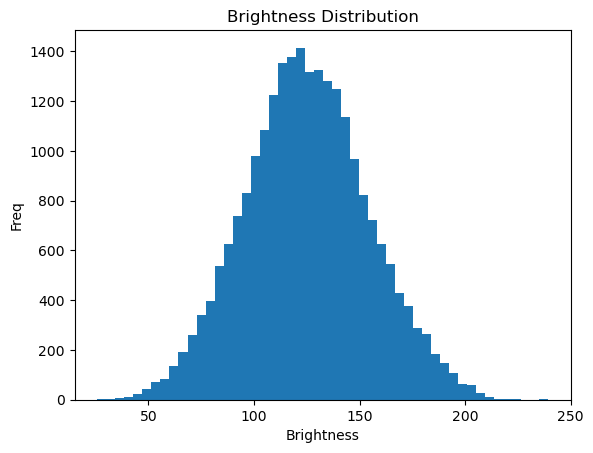

In [41]:
plt.hist(df["brightness"], bins = 50)
plt.title("Brightness Distribution")
plt.xlabel("Brightness")
plt.ylabel("Freq")
plt.show()

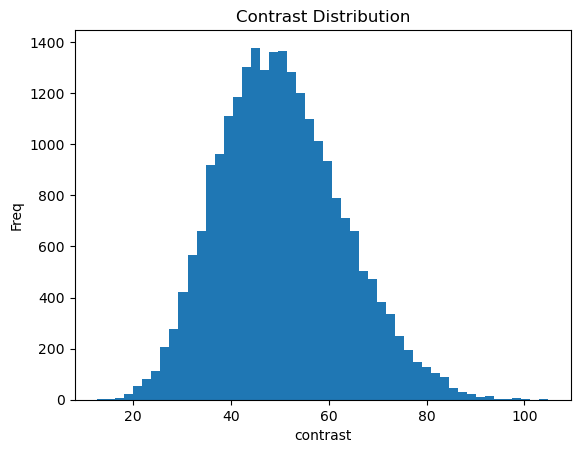

In [42]:
plt.hist(df["contrast"], bins = 50)
plt.title("Contrast Distribution")
plt.xlabel("contrast")
plt.ylabel("Freq")
plt.show()

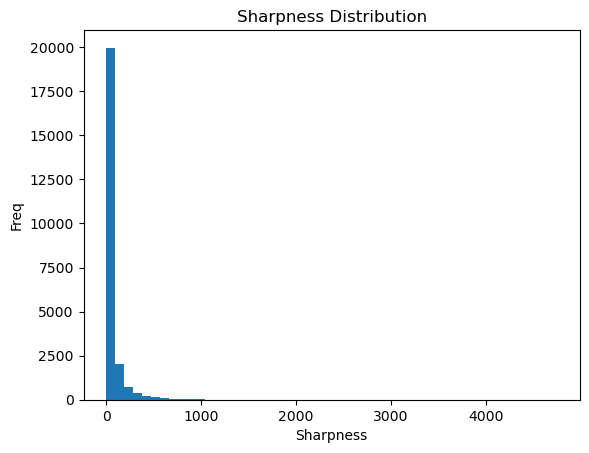

In [43]:
plt.hist(df["sharpness"], bins = 50)
plt.title("Sharpness Distribution")
plt.xlabel("Sharpness")
plt.ylabel("Freq")
plt.show()

## RGB distribution of An Image (sample)
imread

(BGR2RGB)

COLOR_CHANNELS = ('r','g','b')

for i in color_channels:

his, bins = np.hist(img[:,:,i].ravel(),256,[0,256])

plt.plot()

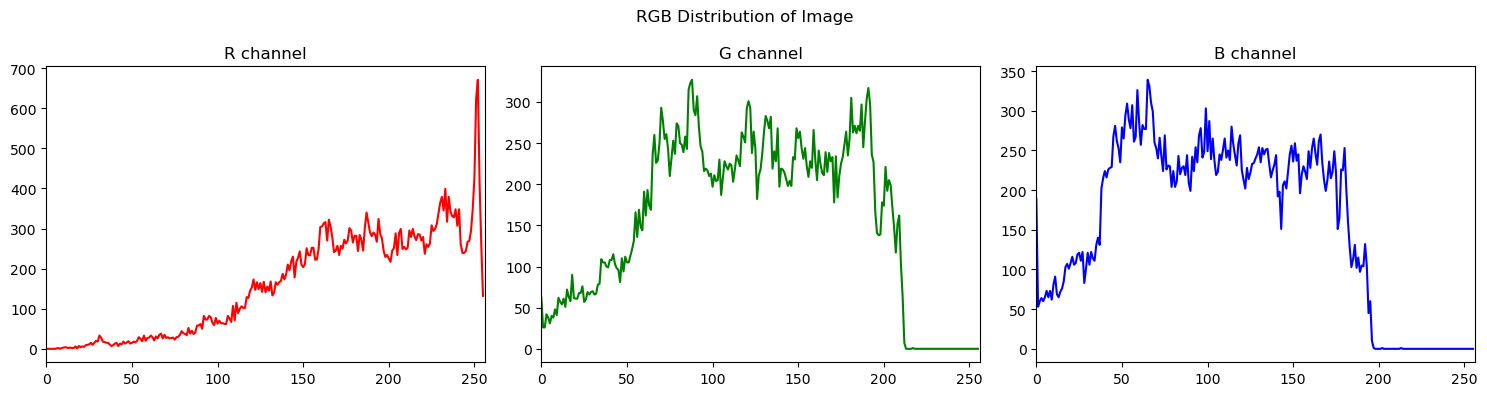

In [44]:
image_path = "./UTKFace/1_0_4_20161221202305778.jpg.chip.jpg"
img = cv2.imread(image_path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

COLOR_CHANNELS = ('r', 'g', 'b')

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('RGB Distribution of Image')

for i, color_channel in enumerate(COLOR_CHANNELS):

    hist, bins = np.histogram(img_rgb[:, :, i].ravel(), bins=256, range=[0, 256])
    
    axes[i].plot(hist, color=color_channel)
    axes[i].set_xlim([0, 256])
    axes[i].set_title(f'{color_channel.upper()} channel')

plt.tight_layout()
plt.show()

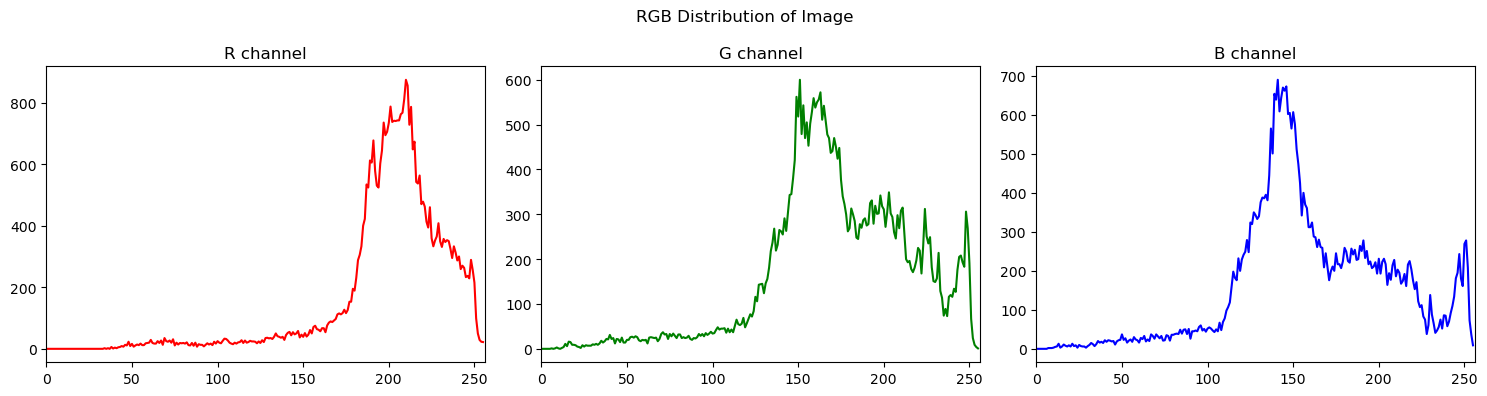

In [45]:
image_path = "./UTKFace/1_0_0_20161219140642920.jpg.chip.jpg"
img = cv2.imread(image_path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

COLOR_CHANNELS = ('r', 'g', 'b')

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('RGB Distribution of Image')

for i, color_channel in enumerate(COLOR_CHANNELS):

    hist, bins = np.histogram(img_rgb[:, :, i].ravel(), bins=256, range=[0, 256])
    
    axes[i].plot(hist, color=color_channel)
    axes[i].set_xlim([0, 256])
    axes[i].set_title(f'{color_channel.upper()} channel')

plt.tight_layout()
plt.show()

*  The distribution of pixel intensities is not directly contribute to age detection